# Midterm Exam

**Author:** Javed Ali

**Date:** October 14, 2021

## Import libraries and load the data

In [4]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from pandasgui import show
import math

import os

import warnings
warnings.filterwarnings("ignore")

In [148]:
df = pd.read_excel("Midterm_Exam.xlsx")

In [149]:
df

,Year,Month,Day,P,Ep,Q
0,1963,1,1,0.13,1.25460,0.9004
1,1963,1,2,0.16,1.14150,0.8506
2,1963,1,3,0.46,1.06330,0.8340
3,1963,1,4,0.00,1.33210,0.7974
4,1963,1,5,0.00,1.44830,0.7642
...,...,...,...,...,...,...
2917,1970,12,27,0.95,0.72900,1.5616
2918,1970,12,28,44.19,0.79277,1.7310
2919,1970,12,29,2.53,0.80667,2.8208
2920,1970,12,30,1.24,0.83700,2.5417


In [150]:
df1 = pd.DataFrame(df)

In [151]:
df1

,Year,Month,Day,P,Ep,Q
0,1963,1,1,0.13,1.25460,0.9004
1,1963,1,2,0.16,1.14150,0.8506
2,1963,1,3,0.46,1.06330,0.8340
3,1963,1,4,0.00,1.33210,0.7974
4,1963,1,5,0.00,1.44830,0.7642
...,...,...,...,...,...,...
2917,1970,12,27,0.95,0.72900,1.5616
2918,1970,12,28,44.19,0.79277,1.7310
2919,1970,12,29,2.53,0.80667,2.8208
2920,1970,12,30,1.24,0.83700,2.5417


## Q1 and Q2

**Best values of the parameters (NSE = 0.69678)**

$a = 1.97$

$S_b = 600$

$\Gamma = 0.5$

$k_d = 0.25$

$k_b = 0.0005$

$S_0 = 500$

$S_{d0} = 0$

$S_{g0} = 200$


In [152]:
# values of the parameters
a = 1.97
Sb = 600
Gamma = 0.5
kd = 0.25
kb = 0.0005
S0 = 500
Sd0 = 0
Sg0 = 200


df['S0'] = S0
df['Sd0'] = Sd0
df['Sg0'] = Sg0
df['kd'] = kd
df['kb'] = kb
df['Sb'] = Sb
df['a'] = a
df['Gamma'] = Gamma
df['date'] = df['Year'].astype(str) + "-" +  df['Month'].astype(str) + "-" + df['Day'].astype(str)

for i in range(1, len(df)):
    df['m'] = (df['S0'] * (2*df['Sb'] - df['a']*df['S0']))/(2 * df['Sb'] * (df['Sb'] - df['S0']))
    df['W'] = (df['P'] + df['Sb']*(((1+df['m'])**2 - 2*df['a']*df['m'])**0.5) - ((((df['P'] + (1+df['m'])*df['Sb']))**2 - 2*df['a']*df['m'] * (df['Sb'] ** 2) - 2*df['a']*df['Sb']*df['P']))**0.5)/df['a']
    df['Es'] = (df['Ep'] + df['Sb'] - ((df['Ep']+df['Sb'])**2 - 2*df['a']*df['Sb']*df['Ep'])**0.5)/df['a']
    df['E'] = (((df['W'] + df['S0'])/df['Sb']) * df['Es'])
    df.loc[i, 'S0'] = (df.loc[i-1,'S0']) + (df.loc[i-1, 'W'] - df.loc[i-1, 'E'])
    df['R'] = df['P'] - df['W']
    df['Rd'] = df['Gamma'] * df['R']
    df['Rg'] = (1 - df['Gamma']) * df['R']
    df.loc[i, 'Sd0'] = (1-df.loc[i,'kd']) * (df.loc[i-1, 'Sd0'] + df.loc[i-1, 'Rd'])
    df.loc[i, 'Sg0'] = (1-df.loc[i,'kb']) * (df.loc[i-1, 'Sg0'] + df.loc[i-1, 'Rg'])
    df['Qd'] = df['kd'] * (df['Sd0'] + df['Rd'])
    df['Qb'] = df['kb'] * (df['Sg0'] + df['Rg'])
    df['Qsim'] = df['Qd'] + df['Qb']

Qm = df.Qsim
Qm = np.array(Qm)
Q0 = df.Q
Q0 = np.array(Q0)
Q0mean = np.mean(Q0)

df1['Qm'] = pd.DataFrame(Qm)
df1['Q0'] = pd.DataFrame(Q0)
df1['Q0mean'] = Q0mean
df2 = (df1['Qm'] - df1['Q0'])**2
df3 = (df1['Q0'] - df1['Q0mean'])**2
df4 = np.sum(df2)
df5 = np.sum(df3)

NSE = 1 - (df4/df5)
NSE

0.6968380773680118

In [153]:
df1

,Year,Month,Day,P,Ep,Q,S0,Sd0,Sg0,kd,...,E,R,Rd,Rg,Qd,Qb,Qsim,Qm,Q0,Q0mean
0,1963,1,1,0.13,1.25460,0.9004,500.000000,0.000000,200.000000,0.25,...,1.045645,4.477984e-02,2.238992e-02,2.238992e-02,0.005597,0.100011,0.105609,0.105609,0.9004,1.654331
1,1963,1,2,0.16,1.14150,0.8506,499.039575,0.016792,199.922379,0.25,...,0.949597,5.441241e-02,2.720620e-02,2.720620e-02,0.011000,0.099975,0.110974,0.110974,0.8506,1.654331
2,1963,1,3,0.46,1.06330,0.8340,498.195566,0.032999,199.849610,0.25,...,0.883403,1.548780e-01,7.743898e-02,7.743898e-02,0.027609,0.099964,0.127573,0.127573,0.8340,1.654331
3,1963,1,4,0.00,1.33210,0.7974,497.617285,0.082828,199.827086,0.25,...,1.104756,2.452635e-13,1.226317e-13,1.226317e-13,0.020707,0.099914,0.120621,0.120621,0.7974,1.654331
4,1963,1,5,0.00,1.44830,0.7642,496.512529,0.062121,199.727172,0.25,...,1.198455,6.636541e-13,3.318271e-13,3.318271e-13,0.015530,0.099864,0.115394,0.115394,0.7642,1.654331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1970,12,27,0.95,0.72900,1.5616,572.467271,2.772326,1719.668697,0.25,...,0.695677,8.332760e-01,4.166380e-01,4.166380e-01,0.797241,0.860043,1.657284,1.657284,1.5616,1.654331
2918,1970,12,28,44.19,0.79277,1.7310,571.888319,2.391723,1719.225293,0.25,...,0.761943,3.939829e+01,1.969915e+01,1.969915e+01,5.522718,0.869462,6.392180,6.392180,1.7310,1.654331
2919,1970,12,29,2.53,0.80667,2.8208,575.918082,16.568153,1738.054978,0.25,...,0.774605,2.286530e+00,1.143265e+00,1.143265e+00,4.427854,0.869599,5.297454,5.297454,2.8208,1.654331
2920,1970,12,30,1.24,0.83700,2.5417,575.386947,13.283563,1738.328644,0.25,...,0.802822,1.115304e+00,5.576520e-01,5.576520e-01,3.460304,0.869443,4.329747,4.329747,2.5417,1.654331


In [154]:
df1.date = pd.to_datetime(df1.date)

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    2922 non-null   int64         
 1   Month   2922 non-null   int64         
 2   Day     2922 non-null   int64         
 3   P       2922 non-null   float64       
 4   Ep      2922 non-null   float64       
 5   Q       2922 non-null   float64       
 6   S0      2922 non-null   float64       
 7   Sd0     2922 non-null   float64       
 8   Sg0     2922 non-null   float64       
 9   kd      2922 non-null   float64       
 10  kb      2922 non-null   float64       
 11  Sb      2922 non-null   int64         
 12  a       2922 non-null   float64       
 13  Gamma   2922 non-null   float64       
 14  date    2922 non-null   datetime64[ns]
 15  m       2922 non-null   float64       
 16  W       2922 non-null   float64       
 17  Es      2922 non-null   float64       
 18  E       

## Q.3: Plot the time series of observed Q and simulated Q in one figure.

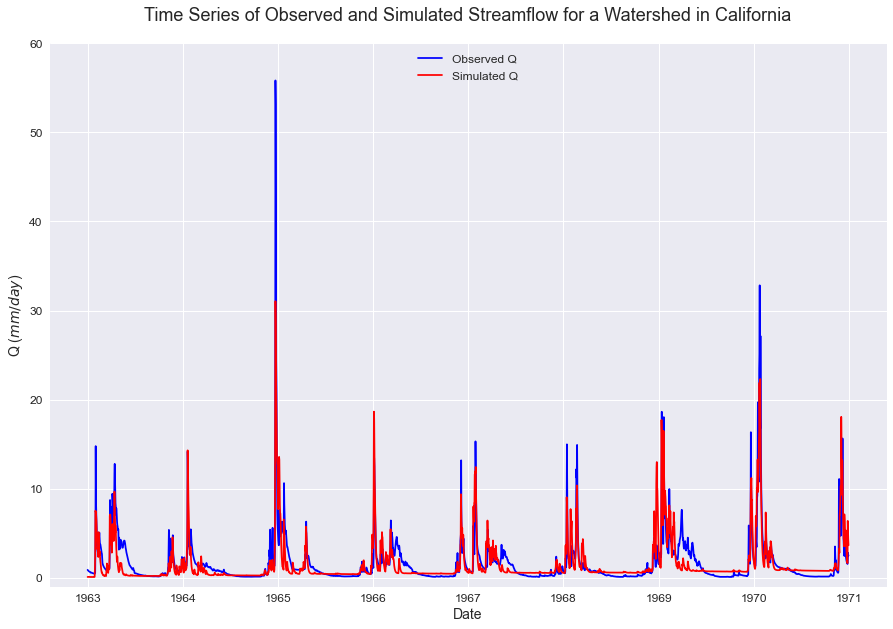

In [156]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

plt.plot(df1['date'], df1['Q'], color='b', label="Observed Q")
plt.plot(df1['date'], df1['Qsim'], color='r', label='Simulated Q')
# plt.plot(df_plot['Ep/P'], df_plot['Lower Bound'], '--', color='g', label='Lower bound')
plt.ylim(bottom=None, top=1.2)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Q ($mm/day$)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper center', fontsize=12)
plt.ylim(-1,60)

plt.title("Time Series of Observed and Simulated Streamflow for a Watershed in California", fontsize=18, y=1.03)

plt.savefig("midterm_exam_q1&2.png", dpi=300)

plt.show()

In [157]:
# save the data
df1.to_excel("midterm_exam_data_with_solutions.xlsx", index=False)

## Q.4: Plot observed Q and simulated Q in a scatter plot and add the 1:1 line.

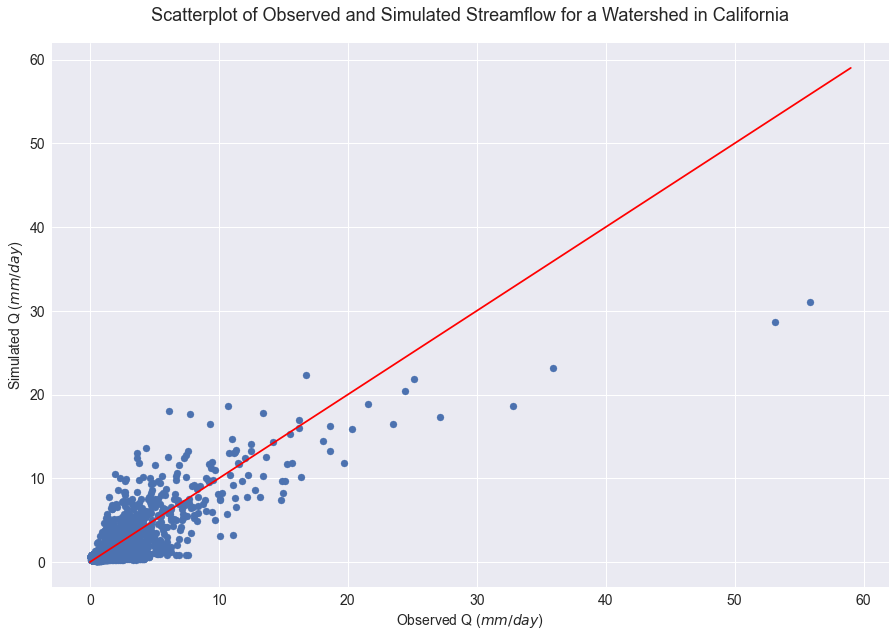

In [159]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# add a line to scatter plot
line1 = list(range(0, 60))
plt.plot(line1, line1, color='red')

plt.scatter(df1['Q'], df1['Qsim'], )

plt.xlabel("Observed Q ($mm/day$)", fontsize=14)
plt.ylabel("Simulated Q ($mm/day$)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Scatterplot of Observed and Simulated Streamflow for a Watershed in California", fontsize=18, y=1.03)

plt.savefig("midterm_exam_q4.png", dpi=300)

plt.show()

### On log-log scale

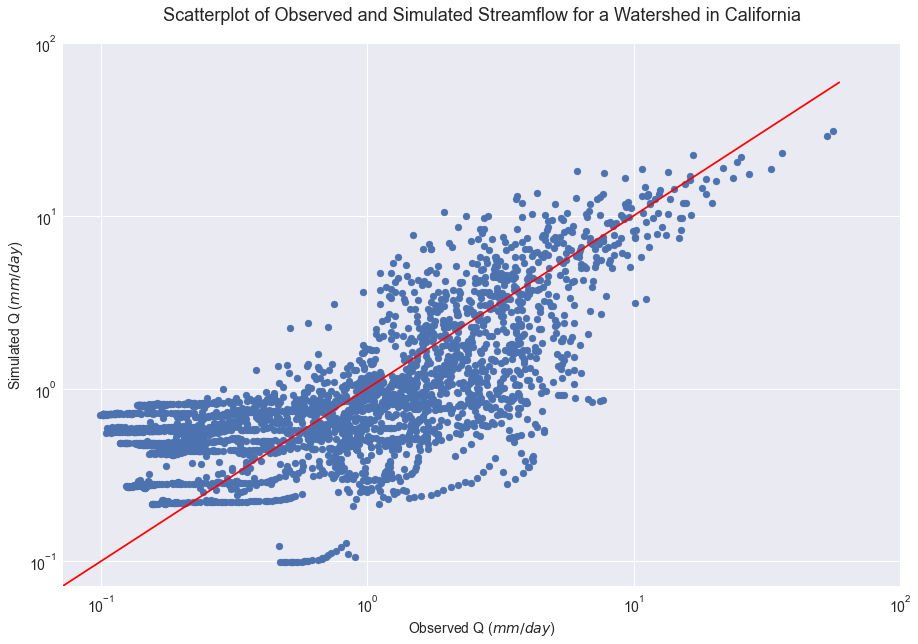

In [174]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# add a line to scatter plot
line1 = list(range(0, 60))
plt.plot(line1, line1, color='red')

plt.scatter(df1['Q'], df1['Qsim'], )

plt.xlabel("Observed Q ($mm/day$)", fontsize=14)
plt.ylabel("Simulated Q ($mm/day$)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0, 100)
plt.xlim(0, 100)

plt.title("Scatterplot of Observed and Simulated Streamflow for a Watershed in California", fontsize=18, y=1.03)

plt.savefig("midterm_exam_q4_log_scale_2.png", dpi=300)

plt.show()